# Drive mount

In [2]:
import os
import json
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
os.chdir("./drive/MyDrive/git_project/Visualizer/notebook")

Mounted at /content/drive


# Import modules

In [62]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from itertools import chain

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV

# Load data

In [4]:
gender_submission = pd.read_csv("../data/gender_submission.csv")
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
original_test = test.copy()

combine = [train, test]

# Data check

## info

In [5]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

## columns

In [6]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


## head details

In [7]:
display(train.head())
display(test.head())
display(gender_submission.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## nullable cols

In [8]:
nullable_columns = train.columns[train.isnull().sum(axis=0) != 0].tolist()
nullable_columns

['Age', 'Cabin', 'Embarked']

## describe

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## data for analysis

In [11]:
train_target = train["Survived"]

train = train.drop("Survived", axis=1)

# preprocess
combine = [train, test]

# Define data type

In [12]:
print(train.apply(lambda col: col.unique().shape[0]))

PassengerId    891
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64


# Generate new features from [reform target cols]

## Name - title

In [13]:
import re
reg_title = re.compile(r", (the )?(?P<title>[A-z ]+)\.")

names = pd.concat([train["Name"], test["Name"]])
titles = names.map(lambda x:reg_title.search(x).group("title"))


train["Title"] = train["Name"].map(lambda x:reg_title.search(x).group("title"))
test["Title"] = test["Name"].map(lambda x:reg_title.search(x).group("title"))

if "Name" in train:
    train.drop("Name", axis=1, inplace=True)
    test.drop("Name", axis=1, inplace=True)

## check with target & get rule base

In [14]:
# def func
def count(srs):
    return srs.shape[0]
def mean(srs):
    return int(srs.mean().round(2)*100)


fe_dict = {
    "Survived":[count, mean],
}

title_gby = pd.concat([train, train_target],axis=1).groupby("Title").agg(fe_dict)
title_gby.columns = ["_".join(c) for c in title_gby.columns]
survived_0_name = title_gby[(title_gby["Survived_mean"] == 0) & (title_gby["Survived_count"] > 3)].index.tolist()
survived_1_name = title_gby[(title_gby["Survived_mean"] == 1) & (title_gby["Survived_count"] > 3)].index.tolist()
survived_0_name, survived_1_name


(['Rev'], [])

In [15]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    if "Name" in dataset:
        dataset.drop(["Name", "PassengerId"], axis=1)

## Ticket

In [16]:
for dataset in combine:
    dataset.drop("Ticket", axis=1, inplace=True)

## Cabin

In [17]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [18]:
for dataset in combine:
    dataset["Cabin_A"] = dataset["Cabin"].str[:1]
    dataset["Cabin_B"] = dataset["Cabin"].str[1:]
    if "Cabin" in dataset:
        dataset.drop("Cabin", axis=1, inplace=True)

# Reform data type

In [19]:
for dataset in combine:
    reform_target_cols = []

    data_len = dataset.shape[0]
    for col in dataset.columns:
        unique_num = dataset[col].unique().shape[0]
        if col == "Name":
            reform_target_cols.append(col)
            continue
        if data_len == unique_num:
            dtype = "object"
        elif unique_num < 10:
            dtype = "category"
        else:
            dtype = "float"

        try:
            dataset[col] = dataset[col].astype(dtype)
        except:
            reform_target_cols.append(col)
    print(f"reform target cols :{reform_target_cols}")
    print(dataset.dtypes)

# bind check target : categorical columns
categorical_columns = train.dtypes[train.dtypes == "category"].index
categorical_columns

reform target cols :['Cabin_B']
PassengerId      object
Pclass         category
Sex            category
Age             float64
SibSp          category
Parch          category
Fare            float64
Embarked       category
Title          category
Cabin_A        category
Cabin_B          object
dtype: object
reform target cols :['Cabin_B']
PassengerId      object
Pclass         category
Sex            category
Age             float64
SibSp          category
Parch          category
Fare            float64
Embarked       category
Title          category
Cabin_A        category
Cabin_B          object
dtype: object


Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'Cabin_A'], dtype='object')

# Data graph

## Survived rate by categorical columns

In [20]:
def survived_rate(srs):
    return (srs == 1).dropna().mean()

alive_related_col_1 = []
death_related_col_1 = []
print("=====================================")
for col in categorical_columns:
    display_df = pd.concat([train, train_target], axis=1)[[col, 'Survived']].groupby([col]).agg(
                {
                    "Survived":survived_rate
                }
            ).sort_values(by='Survived', ascending=False)
    display_df.index = [display_df.index.name + "_" + str(i) for i in display_df.index]
    alive_related_col_1.append(display_df[display_df["Survived"] > 0.8].index.tolist())
    death_related_col_1.append(display_df[display_df["Survived"] < 0.2].index.tolist())
    display(display_df)
    print("=====================================")

,Survived
Pclass_1,0.629630
Pclass_2,0.472826
Pclass_3,0.242363


,Survived
Sex_female,0.742038
Sex_male,0.188908


,Survived
SibSp_1,0.535885
SibSp_2,0.464286
SibSp_0,0.345395
SibSp_3,0.250000
SibSp_4,0.166667
SibSp_5,0.000000
SibSp_8,0.000000


,Survived
Parch_3,0.600000
Parch_1,0.550847
Parch_2,0.500000
Parch_0,0.343658
Parch_5,0.200000
Parch_4,0.000000
Parch_6,0.000000


,Survived
Embarked_C,0.553571
Embarked_Q,0.389610
Embarked_S,0.336957


,Survived
Title_Mrs,0.793651
Title_Miss,0.702703
Title_Master,0.575000
Title_Rare,0.347826
Title_Mr,0.156673


,Survived
Cabin_A_D,0.757576
Cabin_A_E,0.750000
Cabin_A_B,0.744681
Cabin_A_F,0.615385
Cabin_A_C,0.593220
Cabin_A_G,0.500000
Cabin_A_A,0.466667
Cabin_A_T,0.000000


In [21]:
alive_related_col_1 = list(chain(*alive_related_col_1))
death_related_col_1 = list(chain(*alive_related_col_1))

## Survived rate by 2 categorical columns

In [22]:
alive_related_col_2 = []
death_related_col_2 = []
print("=====================================")
for row in categorical_columns:
    for col in categorical_columns:
        if row == col:
            continue
        display_df = pd.concat([train, train_target], axis=1)[[row, col, 'Survived']].groupby([row, col]).agg(
            {
                "Survived":survived_rate
            }
        ).sort_values(by='Survived', ascending=False)

        index_strs = []
        for i in display_df.index:
            index_str = []
            for index, n in enumerate(display_df.index.names):
                index_str.append(n + "_" +str(i[index]))
            index_strs.append("_".join(index_str))

        display_df.index = index_strs
        display_df.dropna(inplace=True)
        alive_related_col_2.append(display_df[display_df["Survived"] > 0.9].index.tolist())
        death_related_col_2.append(display_df[display_df["Survived"] < 0.1].index.tolist())

        display(display_df)
        print("=====================================")

,Survived
Pclass_1_Sex_female,0.968085
Pclass_2_Sex_female,0.921053
Pclass_3_Sex_female,0.500000
Pclass_1_Sex_male,0.368852
Pclass_2_Sex_male,0.157407
Pclass_3_Sex_male,0.135447


,Survived
Pclass_2_SibSp_3,1.000000
Pclass_1_SibSp_2,0.800000
Pclass_1_SibSp_1,0.746479
Pclass_1_SibSp_3,0.666667
Pclass_2_SibSp_1,0.581818
Pclass_1_SibSp_0,0.562044
Pclass_2_SibSp_2,0.500000
Pclass_2_SibSp_0,0.416667
Pclass_3_SibSp_2,0.333333
Pclass_3_SibSp_1,0.325301


,Survived
Pclass_2_Parch_3,1.000000
Pclass_2_Parch_2,0.812500
Pclass_1_Parch_2,0.761905
Pclass_2_Parch_1,0.750000
Pclass_1_Parch_1,0.677419
Pclass_1_Parch_0,0.607362
Pclass_3_Parch_1,0.363636
Pclass_2_Parch_0,0.358209
Pclass_3_Parch_3,0.333333
Pclass_3_Parch_2,0.255814


,Survived
Pclass_1_Embarked_C,0.694118
Pclass_2_Embarked_Q,0.666667
Pclass_1_Embarked_S,0.582677
Pclass_2_Embarked_C,0.529412
Pclass_1_Embarked_Q,0.500000
Pclass_2_Embarked_S,0.463415
Pclass_3_Embarked_C,0.378788
Pclass_3_Embarked_Q,0.375000
Pclass_3_Embarked_S,0.189802


,Survived
Pclass_1_Title_Master,1.000000
Pclass_2_Title_Master,1.000000
Pclass_1_Title_Mrs,0.976744
Pclass_1_Title_Miss,0.958333
Pclass_2_Title_Miss,0.942857
Pclass_2_Title_Mrs,0.902439
Pclass_1_Title_Rare,0.533333
Pclass_3_Title_Miss,0.500000
Pclass_3_Title_Mrs,0.500000
Pclass_3_Title_Master,0.392857


,Survived
Pclass_3_Cabin_A_E,1.000000
Pclass_2_Cabin_A_F,0.875000
Pclass_1_Cabin_A_D,0.758621
Pclass_2_Cabin_A_D,0.750000
Pclass_2_Cabin_A_E,0.750000
Pclass_1_Cabin_A_B,0.744681
Pclass_1_Cabin_A_E,0.720000
Pclass_1_Cabin_A_C,0.593220
Pclass_3_Cabin_A_G,0.500000
Pclass_1_Cabin_A_A,0.466667


,Survived
Sex_female_Pclass_1,0.968085
Sex_female_Pclass_2,0.921053
Sex_female_Pclass_3,0.500000
Sex_male_Pclass_1,0.368852
Sex_male_Pclass_2,0.157407
Sex_male_Pclass_3,0.135447


,Survived
Sex_female_SibSp_0,0.787356
Sex_female_SibSp_2,0.769231
Sex_female_SibSp_1,0.754717
Sex_female_SibSp_3,0.363636
Sex_female_SibSp_4,0.333333
Sex_male_SibSp_1,0.310680
Sex_male_SibSp_2,0.200000
Sex_male_SibSp_0,0.168203
Sex_male_SibSp_4,0.083333
Sex_female_SibSp_5,0.000000


,Survived
Sex_female_Parch_0,0.788660
Sex_female_Parch_1,0.766667
Sex_female_Parch_3,0.750000
Sex_female_Parch_2,0.612245
Sex_male_Parch_1,0.327586
Sex_male_Parch_2,0.322581
Sex_female_Parch_5,0.250000
Sex_male_Parch_0,0.165289
Sex_female_Parch_4,0.000000
Sex_female_Parch_6,0.000000


,Survived
Sex_female_Embarked_C,0.876712
Sex_female_Embarked_Q,0.750000
Sex_female_Embarked_S,0.689655
Sex_male_Embarked_C,0.305263
Sex_male_Embarked_S,0.174603
Sex_male_Embarked_Q,0.073171


,Survived
Sex_female_Title_Rare,1.000000
Sex_female_Title_Mrs,0.793651
Sex_female_Title_Miss,0.702703
Sex_male_Title_Master,0.575000
Sex_male_Title_Rare,0.250000
Sex_male_Title_Mr,0.156673


,Survived
Sex_female_Cabin_A_A,1.000000
Sex_female_Cabin_A_B,1.000000
Sex_female_Cabin_A_D,1.000000
Sex_female_Cabin_A_F,1.000000
Sex_female_Cabin_A_E,0.933333
Sex_female_Cabin_A_C,0.888889
Sex_male_Cabin_A_E,0.588235
Sex_female_Cabin_A_G,0.500000
Sex_male_Cabin_A_D,0.466667
Sex_male_Cabin_A_A,0.428571


,Survived
SibSp_3_Pclass_2,1.000000
SibSp_2_Pclass_1,0.800000
SibSp_1_Pclass_1,0.746479
SibSp_3_Pclass_1,0.666667
SibSp_1_Pclass_2,0.581818
SibSp_0_Pclass_1,0.562044
SibSp_2_Pclass_2,0.500000
SibSp_0_Pclass_2,0.416667
SibSp_2_Pclass_3,0.333333
SibSp_1_Pclass_3,0.325301


,Survived
SibSp_0_Sex_female,0.787356
SibSp_2_Sex_female,0.769231
SibSp_1_Sex_female,0.754717
SibSp_3_Sex_female,0.363636
SibSp_4_Sex_female,0.333333
SibSp_1_Sex_male,0.310680
SibSp_2_Sex_male,0.200000
SibSp_0_Sex_male,0.168203
SibSp_4_Sex_male,0.083333
SibSp_3_Sex_male,0.000000


,Survived
SibSp_3_Parch_0,1.000000
SibSp_0_Parch_3,1.000000
SibSp_2_Parch_3,1.000000
SibSp_2_Parch_1,0.857143
SibSp_0_Parch_2,0.724138
SibSp_0_Parch_1,0.657895
SibSp_1_Parch_2,0.631579
SibSp_1_Parch_1,0.596491
SibSp_1_Parch_0,0.520325
SibSp_2_Parch_2,0.500000


,Survived
SibSp_2_Embarked_C,0.833333
SibSp_1_Embarked_C,0.679245
SibSp_2_Embarked_Q,0.666667
SibSp_1_Embarked_S,0.489655
SibSp_0_Embarked_C,0.477064
SibSp_1_Embarked_Q,0.454545
SibSp_0_Embarked_Q,0.389831
SibSp_2_Embarked_S,0.315789
SibSp_0_Embarked_S,0.303653
SibSp_3_Embarked_S,0.250000


,Survived
SibSp_0_Title_Master,1.000000
SibSp_2_Title_Master,1.000000
SibSp_3_Title_Mrs,1.000000
SibSp_1_Title_Master,1.000000
SibSp_2_Title_Mrs,1.000000
SibSp_0_Title_Mrs,0.826087
SibSp_0_Title_Miss,0.769841
SibSp_1_Title_Mrs,0.760000
SibSp_1_Title_Miss,0.733333
SibSp_2_Title_Miss,0.700000


,Survived
SibSp_2_Cabin_A_F,1.000000
SibSp_2_Cabin_A_B,1.000000
SibSp_1_Cabin_A_F,1.000000
SibSp_1_Cabin_A_A,1.000000
SibSp_1_Cabin_A_D,0.928571
SibSp_1_Cabin_A_B,0.846154
SibSp_0_Cabin_A_E,0.772727
SibSp_1_Cabin_A_E,0.700000
SibSp_0_Cabin_A_B,0.687500
SibSp_3_Cabin_A_C,0.666667


,Survived
Parch_3_Pclass_2,1.000000
Parch_2_Pclass_2,0.812500
Parch_2_Pclass_1,0.761905
Parch_1_Pclass_2,0.750000
Parch_1_Pclass_1,0.677419
Parch_0_Pclass_1,0.607362
Parch_1_Pclass_3,0.363636
Parch_0_Pclass_2,0.358209
Parch_3_Pclass_3,0.333333
Parch_2_Pclass_3,0.255814


,Survived
Parch_0_Sex_female,0.788660
Parch_1_Sex_female,0.766667
Parch_3_Sex_female,0.750000
Parch_2_Sex_female,0.612245
Parch_1_Sex_male,0.327586
Parch_2_Sex_male,0.322581
Parch_5_Sex_female,0.250000
Parch_0_Sex_male,0.165289
Parch_3_Sex_male,0.000000
Parch_4_Sex_female,0.000000


,Survived
Parch_3_SibSp_0,1.000000
Parch_0_SibSp_3,1.000000
Parch_3_SibSp_2,1.000000
Parch_1_SibSp_2,0.857143
Parch_2_SibSp_0,0.724138
Parch_1_SibSp_0,0.657895
Parch_2_SibSp_1,0.631579
Parch_1_SibSp_1,0.596491
Parch_0_SibSp_1,0.520325
Parch_2_SibSp_2,0.500000


,Survived
Parch_3_Embarked_C,1.000000
Parch_2_Embarked_C,0.714286
Parch_1_Embarked_C,0.633333
Parch_1_Embarked_S,0.560976
Parch_0_Embarked_C,0.512195
Parch_3_Embarked_S,0.500000
Parch_2_Embarked_S,0.461538
Parch_0_Embarked_Q,0.434783
Parch_0_Embarked_S,0.285124
Parch_5_Embarked_S,0.250000


,Survived
Parch_0_Title_Master,1.000000
Parch_0_Title_Mrs,0.857143
Parch_1_Title_Mrs,0.812500
Parch_2_Title_Mrs,0.769231
Parch_3_Title_Mrs,0.750000
Parch_0_Title_Miss,0.743802
Parch_1_Title_Miss,0.714286
Parch_1_Title_Master,0.608696
Parch_2_Title_Miss,0.555556
Parch_2_Title_Master,0.500000


,Survived
Parch_2_Cabin_A_G,1.000000
Parch_2_Cabin_A_E,1.000000
Parch_1_Cabin_A_F,1.000000
Parch_2_Cabin_A_A,1.000000
Parch_2_Cabin_A_B,1.000000
Parch_1_Cabin_A_E,0.875000
Parch_0_Cabin_A_D,0.800000
Parch_1_Cabin_A_B,0.727273
Parch_0_Cabin_A_E,0.695652
Parch_0_Cabin_A_B,0.678571


,Survived
Embarked_C_Pclass_1,0.694118
Embarked_Q_Pclass_2,0.666667
Embarked_S_Pclass_1,0.582677
Embarked_C_Pclass_2,0.529412
Embarked_Q_Pclass_1,0.500000
Embarked_S_Pclass_2,0.463415
Embarked_C_Pclass_3,0.378788
Embarked_Q_Pclass_3,0.375000
Embarked_S_Pclass_3,0.189802


,Survived
Embarked_C_Sex_female,0.876712
Embarked_Q_Sex_female,0.750000
Embarked_S_Sex_female,0.689655
Embarked_C_Sex_male,0.305263
Embarked_S_Sex_male,0.174603
Embarked_Q_Sex_male,0.073171


,Survived
Embarked_C_SibSp_2,0.833333
Embarked_C_SibSp_1,0.679245
Embarked_Q_SibSp_2,0.666667
Embarked_S_SibSp_1,0.489655
Embarked_C_SibSp_0,0.477064
Embarked_Q_SibSp_1,0.454545
Embarked_Q_SibSp_0,0.389831
Embarked_S_SibSp_2,0.315789
Embarked_S_SibSp_0,0.303653
Embarked_S_SibSp_3,0.250000


,Survived
Embarked_C_Parch_3,1.000000
Embarked_C_Parch_2,0.714286
Embarked_C_Parch_1,0.633333
Embarked_S_Parch_1,0.560976
Embarked_C_Parch_0,0.512195
Embarked_S_Parch_3,0.500000
Embarked_S_Parch_2,0.461538
Embarked_Q_Parch_0,0.434783
Embarked_S_Parch_0,0.285124
Embarked_S_Parch_5,0.250000


,Survived
Embarked_C_Title_Master,1.000000
Embarked_C_Title_Mrs,0.906250
Embarked_C_Title_Miss,0.850000
Embarked_Q_Title_Miss,0.787879
Embarked_S_Title_Mrs,0.766667
Embarked_C_Title_Rare,0.666667
Embarked_S_Title_Miss,0.621622
Embarked_S_Title_Master,0.580645
Embarked_Q_Title_Mrs,0.333333
Embarked_S_Title_Rare,0.266667


,Survived
Embarked_C_Cabin_A_E,1.000000
Embarked_C_Cabin_A_F,1.000000
Embarked_Q_Cabin_A_E,1.000000
Embarked_C_Cabin_A_D,0.846154
Embarked_C_Cabin_A_B,0.772727
Embarked_S_Cabin_A_D,0.700000
Embarked_S_Cabin_A_B,0.695652
Embarked_S_Cabin_A_E,0.692308
Embarked_C_Cabin_A_C,0.666667
Embarked_S_Cabin_A_F,0.636364


,Survived
Title_Master_Pclass_1,1.000000
Title_Master_Pclass_2,1.000000
Title_Mrs_Pclass_1,0.976744
Title_Miss_Pclass_1,0.958333
Title_Miss_Pclass_2,0.942857
Title_Mrs_Pclass_2,0.902439
Title_Rare_Pclass_1,0.533333
Title_Miss_Pclass_3,0.500000
Title_Mrs_Pclass_3,0.500000
Title_Master_Pclass_3,0.392857


,Survived
Title_Rare_Sex_female,1.000000
Title_Mrs_Sex_female,0.793651
Title_Miss_Sex_female,0.702703
Title_Master_Sex_male,0.575000
Title_Rare_Sex_male,0.250000
Title_Mr_Sex_male,0.156673


,Survived
Title_Master_SibSp_0,1.000000
Title_Master_SibSp_1,1.000000
Title_Master_SibSp_2,1.000000
Title_Mrs_SibSp_3,1.000000
Title_Mrs_SibSp_2,1.000000
Title_Mrs_SibSp_0,0.826087
Title_Miss_SibSp_0,0.769841
Title_Mrs_SibSp_1,0.760000
Title_Miss_SibSp_1,0.733333
Title_Miss_SibSp_2,0.700000


,Survived
Title_Master_Parch_0,1.000000
Title_Mrs_Parch_0,0.857143
Title_Mrs_Parch_1,0.812500
Title_Mrs_Parch_2,0.769231
Title_Mrs_Parch_3,0.750000
Title_Miss_Parch_0,0.743802
Title_Miss_Parch_1,0.714286
Title_Master_Parch_1,0.608696
Title_Miss_Parch_2,0.555556
Title_Master_Parch_2,0.500000


,Survived
Title_Master_Embarked_C,1.000000
Title_Mrs_Embarked_C,0.906250
Title_Miss_Embarked_C,0.850000
Title_Miss_Embarked_Q,0.787879
Title_Mrs_Embarked_S,0.766667
Title_Rare_Embarked_C,0.666667
Title_Miss_Embarked_S,0.621622
Title_Master_Embarked_S,0.580645
Title_Mrs_Embarked_Q,0.333333
Title_Rare_Embarked_S,0.266667


,Survived
Title_Master_Cabin_A_A,1.000000
Title_Miss_Cabin_A_E,1.000000
Title_Rare_Cabin_A_A,1.000000
Title_Mrs_Cabin_A_F,1.000000
Title_Mrs_Cabin_A_D,1.000000
Title_Mrs_Cabin_A_B,1.000000
Title_Master_Cabin_A_B,1.000000
Title_Miss_Cabin_A_F,1.000000
Title_Rare_Cabin_A_D,1.000000
Title_Miss_Cabin_A_D,1.000000


,Survived
Cabin_A_E_Pclass_3,1.000000
Cabin_A_F_Pclass_2,0.875000
Cabin_A_D_Pclass_1,0.758621
Cabin_A_D_Pclass_2,0.750000
Cabin_A_E_Pclass_2,0.750000
Cabin_A_B_Pclass_1,0.744681
Cabin_A_E_Pclass_1,0.720000
Cabin_A_C_Pclass_1,0.593220
Cabin_A_G_Pclass_3,0.500000
Cabin_A_A_Pclass_1,0.466667


,Survived
Cabin_A_A_Sex_female,1.000000
Cabin_A_B_Sex_female,1.000000
Cabin_A_D_Sex_female,1.000000
Cabin_A_F_Sex_female,1.000000
Cabin_A_E_Sex_female,0.933333
Cabin_A_C_Sex_female,0.888889
Cabin_A_E_Sex_male,0.588235
Cabin_A_G_Sex_female,0.500000
Cabin_A_D_Sex_male,0.466667
Cabin_A_A_Sex_male,0.428571


,Survived
Cabin_A_B_SibSp_2,1.000000
Cabin_A_A_SibSp_1,1.000000
Cabin_A_F_SibSp_1,1.000000
Cabin_A_F_SibSp_2,1.000000
Cabin_A_D_SibSp_1,0.928571
Cabin_A_B_SibSp_1,0.846154
Cabin_A_E_SibSp_0,0.772727
Cabin_A_E_SibSp_1,0.700000
Cabin_A_B_SibSp_0,0.687500
Cabin_A_C_SibSp_3,0.666667


,Survived
Cabin_A_F_Parch_1,1.000000
Cabin_A_B_Parch_2,1.000000
Cabin_A_G_Parch_2,1.000000
Cabin_A_A_Parch_2,1.000000
Cabin_A_E_Parch_2,1.000000
Cabin_A_E_Parch_1,0.875000
Cabin_A_D_Parch_0,0.800000
Cabin_A_B_Parch_1,0.727273
Cabin_A_E_Parch_0,0.695652
Cabin_A_B_Parch_0,0.678571


,Survived
Cabin_A_E_Embarked_Q,1.000000
Cabin_A_F_Embarked_C,1.000000
Cabin_A_E_Embarked_C,1.000000
Cabin_A_D_Embarked_C,0.846154
Cabin_A_B_Embarked_C,0.772727
Cabin_A_D_Embarked_S,0.700000
Cabin_A_B_Embarked_S,0.695652
Cabin_A_E_Embarked_S,0.692308
Cabin_A_C_Embarked_C,0.666667
Cabin_A_F_Embarked_S,0.636364


,Survived
Cabin_A_A_Title_Master,1.000000
Cabin_A_F_Title_Miss,1.000000
Cabin_A_E_Title_Miss,1.000000
Cabin_A_E_Title_Master,1.000000
Cabin_A_D_Title_Rare,1.000000
Cabin_A_D_Title_Mrs,1.000000
Cabin_A_F_Title_Mrs,1.000000
Cabin_A_D_Title_Miss,1.000000
Cabin_A_F_Title_Master,1.000000
Cabin_A_C_Title_Master,1.000000


In [23]:
alive_related_col_2 = list(chain(*alive_related_col_2))
death_related_col_2 = list(chain(*alive_related_col_2))

## Distributional columns - Age

In [24]:
# fig_col_num = len(categorical_columns)-1
# # fig = plt.figure(figsize=(18,(6*(fig_col_num))))
# fig_num = 0
# for index, col in enumerate(categorical_columns):
#     g = sns.FacetGrid(pd.concat([train, train_target], axis=1), #the dataframe to pull from
#                     row="Survived", #define the column for each subplot row to be differentiated by
#                     col=col,
#                     #   hue="Sex", #define the column for each subplot color to be differentiated by
#                     aspect=2, #aspect * height = width
#                     height=5, #height of each subplot
#                     # palette=["blue", "red"], #google colors
#                     legend_out=True,
#                     )
#     g.map(sns.kdeplot, "Age", fill=True, alpha=1, lw=1.5, bw_method=0.2)
#     g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
#     g.fig.suptitle(f'Age distribution on {col}')

## Distributional columns -Fare

In [25]:
# fig_col_num = len(categorical_columns)-1
# # fig = plt.figure(figsize=(18,(6*(fig_col_num))))
# fig_num = 0
# for index, col in enumerate(categorical_columns):
#     g = sns.FacetGrid(pd.concat([train, train_target], axis=1), #the dataframe to pull from
#                     row="Survived", #define the column for each subplot row to be differentiated by
#                     col=col,
#                     #   hue="Sex", #define the column for each subplot color to be differentiated by
#                     aspect=2, #aspect * height = width
#                     height=5, #height of each subplot
#                     # palette=["blue", "red"], #google colors
#                     legend_out=True,
#                     )
#     g.map(sns.kdeplot, "Fare", fill=True, alpha=1, lw=1.5, bw_method=0.2)
#     g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
#     g.fig.suptitle(f'Age distribution on {col}')

# Category to int

In [26]:
for col in categorical_columns:
    dummy = pd.get_dummies(train[col])
    dummy.columns = [col + "_" + str(c) for c in dummy.columns]
    train = pd.concat([train, dummy], axis=1)
    train.drop(col, axis=1, inplace=True)

for col in categorical_columns:
    dummy = pd.get_dummies(test[col])
    dummy.columns = [col + "_" + str(c) for c in dummy.columns]
    test = pd.concat([test, dummy], axis=1)
    test.drop(col, axis=1, inplace=True)

combine = [train, test]

# Drop not use column

In [27]:
for dataset in combine:
    dataset.drop("PassengerId", axis=1, inplace=True)

# Data corr with target

In [28]:
pd.concat([train, train_target], axis=1).corr()["Survived"].abs().sort_values(ascending=False)[1:]

<ipython-input-28-ed86137b5657>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.concat([train, train_target], axis=1).corr()["Survived"].abs().sort_values(ascending=False)[1:]


Title_Mr        0.549199
Sex_female      0.543351
Sex_male        0.543351
Title_Mrs       0.341994
Title_Miss      0.335636
Pclass_3        0.322308
Pclass_1        0.285904
Fare            0.257307
Cabin_A_B       0.175095
SibSp_1         0.173076
Embarked_C      0.168240
Embarked_S      0.155660
Cabin_A_D       0.150716
Parch_0         0.147408
Cabin_A_E       0.145321
Parch_1         0.134174
SibSp_0         0.115867
Cabin_A_C       0.114652
Pclass_2        0.093349
Title_Master    0.085221
Age             0.077221
Parch_2         0.075020
SibSp_8         0.070234
SibSp_4         0.064123
SibSp_5         0.059292
Cabin_A_F       0.057935
Parch_4         0.053002
SibSp_3         0.037215
Parch_3         0.033391
SibSp_2         0.029796
Parch_5         0.028398
Parch_6         0.026456
Cabin_A_T       0.026456
Cabin_A_A       0.022287
Cabin_A_G       0.016040
Title_Rare      0.012054
Embarked_Q      0.003650
Name: Survived, dtype: float64

# Fill null data

## Age
support cols: Pclass, Sex  
method : median

In [29]:
train.isna().sum(axis=0), test.isna().sum(axis=0)

(Age             177
 Fare              0
 Cabin_B         687
 Pclass_1          0
 Pclass_2          0
 Pclass_3          0
 Sex_female        0
 Sex_male          0
 SibSp_0           0
 SibSp_1           0
 SibSp_2           0
 SibSp_3           0
 SibSp_4           0
 SibSp_5           0
 SibSp_8           0
 Parch_0           0
 Parch_1           0
 Parch_2           0
 Parch_3           0
 Parch_4           0
 Parch_5           0
 Parch_6           0
 Embarked_C        0
 Embarked_Q        0
 Embarked_S        0
 Title_Master      0
 Title_Miss        0
 Title_Mr          0
 Title_Mrs         0
 Title_Rare        0
 Cabin_A_A         0
 Cabin_A_B         0
 Cabin_A_C         0
 Cabin_A_D         0
 Cabin_A_E         0
 Cabin_A_F         0
 Cabin_A_G         0
 Cabin_A_T         0
 dtype: int64,
 Age              86
 Fare              1
 Cabin_B         327
 Pclass_1          0
 Pclass_2          0
 Pclass_3          0
 Sex_female        0
 Sex_male          0
 SibSp_0           

In [30]:
median_target_cols = train.columns[train.columns.str.contains("Pclass|Sex", regex=True)].tolist()
median_target_cols

['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male']

In [31]:
df = pd.concat([train, test])
median_target_df = df[~df["Age"].isna()]
age_median_df = median_target_df[median_target_cols+["Age"]].groupby(["Pclass_1", "Pclass_2", "Pclass_3", "Sex_female", "Sex_male"]).agg(
    {
        "Age":lambda x:x.median()
    }
)

apply_target = df[df["Age"].isna()]
display(age_median_df.head())
display(apply_target.head())


Age
Pclass_1 Pclass_2 Pclass_3 Sex_female Sex_male      
0        0        1        0          1         25.0
                           1          0         22.0
         1        0        0          1         29.5
                           1          0         28.0
1        0        0        0          1         42.0

,Age,Fare,Cabin_B,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Title_Rare,Cabin_A_A,Cabin_A_B,Cabin_A_C,Cabin_A_D,Cabin_A_E,Cabin_A_F,Cabin_A_G,Cabin_A_T,Parch_9
5,NaN,8.4583,NaN,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0.0,NaN
17,NaN,13.0000,NaN,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0.0,NaN
19,NaN,7.2250,NaN,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.0,NaN
26,NaN,7.2250,NaN,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0.0,NaN
28,NaN,7.8792,NaN,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.0,NaN


In [32]:
for dataset in combine:
    apply_target_index = dataset["Age"].isna()
    for col_vals, age_val in zip(age_median_df.index, age_median_df.values):
        dataset.loc[(np.all(dataset[median_target_cols] == col_vals, axis=1)) & (apply_target_index), "Age"] = int(age_val)
train.isna().sum(axis=0)

Age               0
Fare              0
Cabin_B         687
Pclass_1          0
Pclass_2          0
Pclass_3          0
Sex_female        0
Sex_male          0
SibSp_0           0
SibSp_1           0
SibSp_2           0
SibSp_3           0
SibSp_4           0
SibSp_5           0
SibSp_8           0
Parch_0           0
Parch_1           0
Parch_2           0
Parch_3           0
Parch_4           0
Parch_5           0
Parch_6           0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Title_Master      0
Title_Miss        0
Title_Mr          0
Title_Mrs         0
Title_Rare        0
Cabin_A_A         0
Cabin_A_B         0
Cabin_A_C         0
Cabin_A_D         0
Cabin_A_E         0
Cabin_A_F         0
Cabin_A_G         0
Cabin_A_T         0
dtype: int64

## Fare

In [33]:
median_target_df = df[~df["Fare"].isna()]
median_df = median_target_df[median_target_cols+["Fare"]].groupby(["Pclass_1", "Pclass_2", "Pclass_3", "Sex_female", "Sex_male"]).agg(
    {
        "Fare":lambda x:x.median()
    }
)
display(median_df.head())
display(apply_target.head())

for dataset in combine:
    apply_target_index = dataset["Fare"].isna()
    for col_vals, val in zip(median_df.index, median_df.values):
        dataset.loc[(np.all(dataset[median_target_cols] == col_vals, axis=1)) & (apply_target_index), "Fare"] = int(val)
train.isna().sum(axis=0), test.isna().sum(axis=0)

Fare
Pclass_1 Pclass_2 Pclass_3 Sex_female Sex_male         
0        0        1        0          1          7.8958
                           1          0         10.4896
         1        0        0          1         13.0000
                           1          0         23.0000
1        0        0        0          1         49.5042

,Age,Fare,Cabin_B,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Title_Rare,Cabin_A_A,Cabin_A_B,Cabin_A_C,Cabin_A_D,Cabin_A_E,Cabin_A_F,Cabin_A_G,Cabin_A_T,Parch_9
5,NaN,8.4583,NaN,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0.0,NaN
17,NaN,13.0000,NaN,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0.0,NaN
19,NaN,7.2250,NaN,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.0,NaN
26,NaN,7.2250,NaN,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0.0,NaN
28,NaN,7.8792,NaN,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0.0,NaN


(Age               0
 Fare              0
 Cabin_B         687
 Pclass_1          0
 Pclass_2          0
 Pclass_3          0
 Sex_female        0
 Sex_male          0
 SibSp_0           0
 SibSp_1           0
 SibSp_2           0
 SibSp_3           0
 SibSp_4           0
 SibSp_5           0
 SibSp_8           0
 Parch_0           0
 Parch_1           0
 Parch_2           0
 Parch_3           0
 Parch_4           0
 Parch_5           0
 Parch_6           0
 Embarked_C        0
 Embarked_Q        0
 Embarked_S        0
 Title_Master      0
 Title_Miss        0
 Title_Mr          0
 Title_Mrs         0
 Title_Rare        0
 Cabin_A_A         0
 Cabin_A_B         0
 Cabin_A_C         0
 Cabin_A_D         0
 Cabin_A_E         0
 Cabin_A_F         0
 Cabin_A_G         0
 Cabin_A_T         0
 dtype: int64,
 Age               0
 Fare              0
 Cabin_B         327
 Pclass_1          0
 Pclass_2          0
 Pclass_3          0
 Sex_female        0
 Sex_male          0
 SibSp_0           

## CabinB
support cols: Pclass, Sex  
method : median

--> drop

In [34]:
for dataset in combine:
    dataset.drop("Cabin_B", axis=1, inplace=True)

# Corr for each columns

<Axes: >

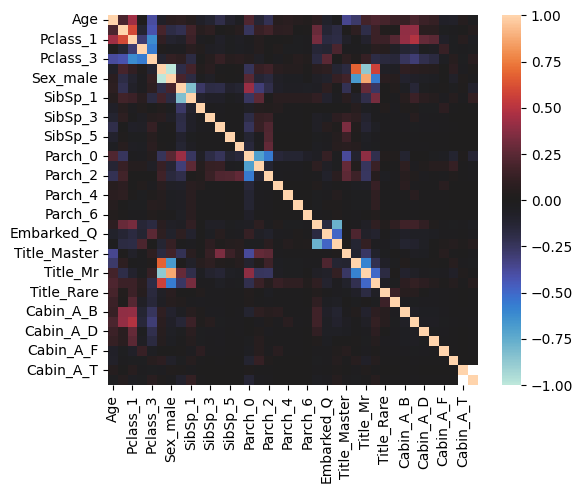

In [35]:
sns.heatmap(pd.concat([train, test]).corr(), square=True, vmax=1, vmin=-1, center=0)

# Ready for train

In [36]:
for dataset in combine:
    dataset = dataset.astype(np.float32)
train.shape, train_target.shape, test.shape

((891, 37), (891,), (418, 37))

In [37]:
gen_cols = set(train.columns) - set(test.columns)
del_cols = set(test.columns) - set(train.columns)

In [38]:
dummy_val = 0
for col in gen_cols:
    test[col] = dummy_val

for col in del_cols:
    test.drop(col, axis=1, inplace=True)

test = test[train.columns]
assert (test.columns != train.columns).sum() == 0

## Preprocessor - Scaler

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

In [40]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Criterion

In [41]:
import torch
from torch.nn import CrossEntropyLoss, BCELoss, BCEWithLogitsLoss
from torch.nn import functional as F
criterion = BCEWithLogitsLoss()

# Train with scheme below

Logistic Regression  
KNN or k-Nearest Neighbors  
Support Vector Machines  
Naive Bayes classifier  
Decision Tree  
Random Forrest  
Perceptron  
Artificial neural network  
RVM or Relevance Vector Machine  

## Logistic Regression

In [45]:
# Logistic Regression
best_model = None
for i, (train_index, valid_index) in enumerate(skf.split(train, train_target)):
    for scaler_name, scaler in zip([
            "None",
            "Standard",
            "MinMax",
            "MaxAbs",
            "Robust"
        ],
         [
            None,
            StandardScaler(),
            MinMaxScaler(),
            MaxAbsScaler(),
            RobustScaler(),
    ]):
        if scaler_name != "None":
            scaled_train = scaler.fit_transform(train)
        else:
            scaled_train = train.values

        fold_train = scaled_train[train_index]
        fold_train_target = train_target.loc[train_index]
        fold_valid = scaled_train[valid_index]
        fold_valid_target = train_target.loc[valid_index]
        logreg = LogisticRegression(max_iter=1000)
        logreg.fit(fold_train, fold_train_target)

        train_pred = logreg.predict(fold_train)
        train_acc = (train_pred == fold_train_target).mean()

        valid_pred = logreg.predict(fold_valid)
        valid_acc = (valid_pred == fold_valid_target).mean()


        # calculate loss
        pred = torch.FloatTensor(logreg.predict_proba(fold_train))
        target = torch.LongTensor(fold_train_target.values)
        target = F.one_hot(target).to(torch.float)
        train_loss = criterion(pred, target)

        pred = torch.FloatTensor(logreg.predict_proba(fold_valid))
        target = torch.LongTensor(fold_valid_target.values)
        target = F.one_hot(target).to(torch.float)
        valid_loss = criterion(pred, target)


        print(f"""
            fold:{i}, scaler:{scaler_name}, train acc:{train_acc:.2f}, valid acc:{valid_acc:.2f}\n
            train loss:{train_loss:.2f}, valid loss:{valid_loss:.2f}
        """)

        if best_model is not None:
            if best_model["valid_loss"] > valid_loss:
                best_model = {
                    "model":logreg,
                    "fold":i,
                    "scaler":scaler_name,
                    "train_acc":train_acc,
                    "valid_acc":valid_acc,
                    "train_loss":train_loss,
                    "valid_loss":valid_loss
                }
        else:
            best_model = {
                "model":logreg,
                "fold":i,
                "scaler":scaler_name,
                "train_acc":train_acc,
                "valid_acc":valid_acc,
                "train_loss":train_loss,
                "valid_loss":valid_loss
            }
best_model


            fold:0, scaler:None, train acc:0.84, valid acc:0.82

            train loss:0.61, valid loss:0.63
        

            fold:0, scaler:Standard, train acc:0.84, valid acc:0.82

            train loss:0.61, valid loss:0.63
        

            fold:0, scaler:MinMax, train acc:0.84, valid acc:0.81

            train loss:0.61, valid loss:0.63
        

            fold:0, scaler:MaxAbs, train acc:0.84, valid acc:0.81

            train loss:0.61, valid loss:0.63
        

            fold:0, scaler:Robust, train acc:0.84, valid acc:0.82

            train loss:0.61, valid loss:0.63
        

            fold:1, scaler:None, train acc:0.84, valid acc:0.84

            train loss:0.61, valid loss:0.62
        

            fold:1, scaler:Standard, train acc:0.84, valid acc:0.83

            train loss:0.61, valid loss:0.62
        

            fold:1, scaler:MinMax, train acc:0.85, valid acc:0.84

            train loss:0.61, valid loss:0.62
        

            fold:1, sca

{'model': LogisticRegression(max_iter=1000),
 'fold': 4,
 'scaler': 'Standard',
 'train_acc': 0.8330995792426368,
 'valid_acc': 0.8595505617977528,
 'train_loss': tensor(0.6156),
 'valid_loss': tensor(0.6030)}

## SVC

In [46]:
# SVC
best_model = None
for i, (train_index, valid_index) in enumerate(skf.split(train, train_target)):
    for scaler_name, scaler in zip([
            "None",
            "Standard",
            "MinMax",
            "MaxAbs",
            "Robust"
        ],
         [
            None,
            StandardScaler(),
            MinMaxScaler(),
            MaxAbsScaler(),
            RobustScaler(),
    ]):
        if scaler_name != "None":
            scaled_train = scaler.fit_transform(train)
        else:
            scaled_train = train.values
        fold_train = scaled_train[train_index]
        fold_train_target = train_target.loc[train_index]
        fold_valid = scaled_train[valid_index]
        fold_valid_target = train_target.loc[valid_index]


        svc = SVC(probability=True, max_iter=1000)
        svc.fit(fold_train, fold_train_target)

        train_pred = svc.predict(fold_train)
        train_acc = (train_pred == fold_train_target).mean()

        valid_pred = svc.predict(fold_valid)
        valid_acc = (valid_pred == fold_valid_target).mean()


        # calculate loss
        pred = torch.FloatTensor(svc.predict_proba(fold_train))
        target = torch.LongTensor(fold_train_target.values)
        target = F.one_hot(target).to(torch.float)
        train_loss = criterion(pred, target)

        pred = torch.FloatTensor(svc.predict_proba(fold_valid))
        target = torch.LongTensor(fold_valid_target.values)
        target = F.one_hot(target).to(torch.float)
        valid_loss = criterion(pred, target)


        print(f"""
            fold:{i}, scaler:{scaler_name}, train acc:{train_acc:.2f}, valid acc:{valid_acc:.2f}\n
            train loss:{train_loss:.2f}, valid loss:{valid_loss:.2f}
        """)

        if best_model is not None:
            if best_model["valid_loss"] > valid_loss:
                best_model = {
                    "model":svc,
                    "fold":i,
                    "scaler":scaler_name,
                    "train_acc":train_acc,
                    "valid_acc":valid_acc,
                    "train_loss":train_loss,
                    "valid_loss":valid_loss
                }
        else:
            best_model = {
                "model":svc,
                "fold":i,
                "scaler":scaler_name,
                "train_acc":train_acc,
                "valid_acc":valid_acc,
                "train_loss":train_loss,
                "valid_loss":valid_loss
            }

best_model


            fold:0, scaler:None, train acc:0.70, valid acc:0.59

            train loss:0.68, valid loss:0.71
        

            fold:0, scaler:Standard, train acc:0.87, valid acc:0.80

            train loss:0.61, valid loss:0.63
        

            fold:0, scaler:MinMax, train acc:0.86, valid acc:0.82

            train loss:0.61, valid loss:0.63
        

            fold:0, scaler:MaxAbs, train acc:0.86, valid acc:0.82

            train loss:0.61, valid loss:0.63
        

            fold:0, scaler:Robust, train acc:0.86, valid acc:0.82

            train loss:0.61, valid loss:0.62
        

            fold:1, scaler:None, train acc:0.67, valid acc:0.72

            train loss:0.69, valid loss:0.68
        

            fold:1, scaler:Standard, train acc:0.86, valid acc:0.80

            train loss:0.61, valid loss:0.63
        

            fold:1, scaler:MinMax, train acc:0.86, valid acc:0.81

            train loss:0.61, valid loss:0.62
        

            fold:1, sca

{'model': SVC(max_iter=1000, probability=True),
 'fold': 4,
 'scaler': 'Robust',
 'train_acc': 0.8330995792426368,
 'valid_acc': 0.8707865168539326,
 'train_loss': tensor(0.6157),
 'valid_loss': tensor(0.6104)}

## KNN

In [48]:
# KNN
best_model = None
for i, (train_index, valid_index) in enumerate(skf.split(train, train_target)):
    for scaler_name, scaler in zip([
            "None",
            "Standard",
            "MinMax",
            "MaxAbs",
            "Robust"
        ],
         [
            None,
            StandardScaler(),
            MinMaxScaler(),
            MaxAbsScaler(),
            RobustScaler(),
    ]):
        if scaler_name != "None":
            scaled_train = scaler.fit_transform(train)
        else:
            scaled_train = train.values
        fold_train = scaled_train[train_index]
        fold_train_target = train_target.loc[train_index]
        fold_valid = scaled_train[valid_index]
        fold_valid_target = train_target.loc[valid_index]


        knn = KNeighborsClassifier(n_neighbors = 3)
        knn.fit(fold_train, fold_train_target)

        train_pred = knn.predict(fold_train)
        train_acc = (train_pred == fold_train_target).mean()

        valid_pred = knn.predict(fold_valid)
        valid_acc = (valid_pred == fold_valid_target).mean()


        # calculate loss
        pred = torch.FloatTensor(knn.predict_proba(fold_train))
        target = torch.LongTensor(fold_train_target.values)
        target = F.one_hot(target).to(torch.float)
        train_loss = criterion(pred, target)

        pred = torch.FloatTensor(knn.predict_proba(fold_valid))
        target = torch.LongTensor(fold_valid_target.values)
        target = F.one_hot(target).to(torch.float)
        valid_loss = criterion(pred, target)


        print(f"""
            fold:{i}, scaler:{scaler_name}, train acc:{train_acc:.2f}, valid acc:{valid_acc:.2f}\n
            train loss:{train_loss:.2f}, valid loss:{valid_loss:.2f}
        """)

        if best_model is not None:
            if best_model["valid_loss"] > valid_loss:
                best_model = {
                    "model":knn,
                    "fold":i,
                    "scaler":scaler_name,
                    "train_acc":train_acc,
                    "valid_acc":valid_acc,
                    "train_loss":train_loss,
                    "valid_loss":valid_loss
                }
        else:
            best_model = {
                "model":knn,
                "fold":i,
                "scaler":scaler_name,
                "train_acc":train_acc,
                "valid_acc":valid_acc,
                "train_loss":train_loss,
                "valid_loss":valid_loss
            }

best_model


            fold:0, scaler:None, train acc:0.86, valid acc:0.73

            train loss:0.59, valid loss:0.67
        

            fold:0, scaler:Standard, train acc:0.88, valid acc:0.77

            train loss:0.57, valid loss:0.62
        

            fold:0, scaler:MinMax, train acc:0.88, valid acc:0.74

            train loss:0.57, valid loss:0.63
        

            fold:0, scaler:MaxAbs, train acc:0.88, valid acc:0.74

            train loss:0.57, valid loss:0.63
        

            fold:0, scaler:Robust, train acc:0.88, valid acc:0.75

            train loss:0.57, valid loss:0.63
        

            fold:1, scaler:None, train acc:0.85, valid acc:0.70

            train loss:0.59, valid loss:0.65
        

            fold:1, scaler:Standard, train acc:0.89, valid acc:0.74

            train loss:0.57, valid loss:0.63
        

            fold:1, scaler:MinMax, train acc:0.88, valid acc:0.76

            train loss:0.57, valid loss:0.62
        

            fold:1, sca

{'model': KNeighborsClassifier(n_neighbors=3),
 'fold': 4,
 'scaler': 'Standard',
 'train_acc': 0.8667601683029453,
 'valid_acc': 0.848314606741573,
 'train_loss': tensor(0.5808),
 'valid_loss': tensor(0.5990)}

## GaussianNB

In [50]:
# GaussianNB
best_model = None
for i, (train_index, valid_index) in enumerate(skf.split(train, train_target)):
    for scaler_name, scaler in zip([
            "None",
            "Standard",
            "MinMax",
            "MaxAbs",
            "Robust"
        ],
         [
            None,
            StandardScaler(),
            MinMaxScaler(),
            MaxAbsScaler(),
            RobustScaler(),
    ]):
        if scaler_name != "None":
            scaled_train = scaler.fit_transform(train)
        else:
            scaled_train = train.values
        fold_train = scaled_train[train_index]
        fold_train_target = train_target.loc[train_index]
        fold_valid = scaled_train[valid_index]
        fold_valid_target = train_target.loc[valid_index]


        gaussian = GaussianNB()
        gaussian.fit(fold_train, fold_train_target)

        train_pred = gaussian.predict(fold_train)
        train_acc = (train_pred == fold_train_target).mean()

        valid_pred = gaussian.predict(fold_valid)
        valid_acc = (valid_pred == fold_valid_target).mean()


        # calculate loss
        pred = torch.FloatTensor(gaussian.predict_proba(fold_train))
        target = torch.LongTensor(fold_train_target.values)
        target = F.one_hot(target).to(torch.float)
        train_loss = criterion(pred, target)

        pred = torch.FloatTensor(gaussian.predict_proba(fold_valid))
        target = torch.LongTensor(fold_valid_target.values)
        target = F.one_hot(target).to(torch.float)
        valid_loss = criterion(pred, target)


        print(f"""
            fold:{i}, scaler:{scaler_name}, train acc:{train_acc:.2f}, valid acc:{valid_acc:.2f}\n
            train loss:{train_loss:.2f}, valid loss:{valid_loss:.2f}
        """)

        if best_model is not None:
            if best_model["valid_loss"] > valid_loss:
                best_model = {
                    "model":gaussian,
                    "fold":i,
                    "scaler":scaler_name,
                    "train_acc":train_acc,
                    "valid_acc":valid_acc,
                    "train_loss":train_loss,
                    "valid_loss":valid_loss
                }
        else:
            best_model = {
                "model":gaussian,
                "fold":i,
                "scaler":scaler_name,
                "train_acc":train_acc,
                "valid_acc":valid_acc,
                "train_loss":train_loss,
                "valid_loss":valid_loss
            }

best_model


            fold:0, scaler:None, train acc:0.43, valid acc:0.44

            train loss:0.79, valid loss:0.79
        

            fold:0, scaler:Standard, train acc:0.41, valid acc:0.41

            train loss:0.80, valid loss:0.80
        

            fold:0, scaler:MinMax, train acc:0.41, valid acc:0.41

            train loss:0.80, valid loss:0.80
        

            fold:0, scaler:MaxAbs, train acc:0.41, valid acc:0.41

            train loss:0.80, valid loss:0.80
        

            fold:0, scaler:Robust, train acc:0.41, valid acc:0.41

            train loss:0.80, valid loss:0.80
        

            fold:1, scaler:None, train acc:0.64, valid acc:0.57

            train loss:0.69, valid loss:0.72
        

            fold:1, scaler:Standard, train acc:0.42, valid acc:0.41

            train loss:0.79, valid loss:0.80
        

            fold:1, scaler:MinMax, train acc:0.42, valid acc:0.41

            train loss:0.79, valid loss:0.80
        

            fold:1, sca

{'model': GaussianNB(),
 'fold': 1,
 'scaler': 'None',
 'train_acc': 0.6395511921458625,
 'valid_acc': 0.5674157303370787,
 'train_loss': tensor(0.6933),
 'valid_loss': tensor(0.7210)}

## Perceptron


In [51]:
# Perceptron
best_model = None
for i, (train_index, valid_index) in enumerate(skf.split(train, train_target)):
    for scaler_name, scaler in zip([
            "None",
            "Standard",
            "MinMax",
            "MaxAbs",
            "Robust"
        ],
         [
            None,
            StandardScaler(),
            MinMaxScaler(),
            MaxAbsScaler(),
            RobustScaler(),
    ]):
        if scaler_name != "None":
            scaled_train = scaler.fit_transform(train)
        else:
            scaled_train = train.values
        fold_train = scaled_train[train_index]
        fold_train_target = train_target.loc[train_index]
        fold_valid = scaled_train[valid_index]
        fold_valid_target = train_target.loc[valid_index]


        perceptron = Perceptron(max_iter=1000)
        clf_isotonic = CalibratedClassifierCV(perceptron, cv=10, method='sigmoid')
        clf_isotonic.fit(fold_train, fold_train_target)

        train_pred = clf_isotonic.predict(fold_train)
        train_acc = (train_pred == fold_train_target).mean()

        valid_pred = clf_isotonic.predict(fold_valid)
        valid_acc = (valid_pred == fold_valid_target).mean()


        # calculate loss
        pred = torch.FloatTensor(clf_isotonic.predict_proba(fold_train))
        target = torch.LongTensor(fold_train_target.values)
        target = F.one_hot(target).to(torch.float)
        train_loss = criterion(pred, target)

        pred = torch.FloatTensor(clf_isotonic.predict_proba(fold_valid))
        target = torch.LongTensor(fold_valid_target.values)
        target = F.one_hot(target).to(torch.float)
        valid_loss = criterion(pred, target)


        print(f"""
            fold:{i}, scaler:{scaler_name}, train acc:{train_acc:.2f}, valid acc:{valid_acc:.2f}\n
            train loss:{train_loss:.2f}, valid loss:{valid_loss:.2f}
        """)

        if best_model is not None:
            if best_model["valid_loss"] > valid_loss:
                best_model = {
                    "model":clf_isotonic,
                    "fold":i,
                    "scaler":scaler_name,
                    "train_acc":train_acc,
                    "valid_acc":valid_acc,
                    "train_loss":train_loss,
                    "valid_loss":valid_loss
                }
        else:
            best_model = {
                "model":clf_isotonic,
                "fold":i,
                "scaler":scaler_name,
                "train_acc":train_acc,
                "valid_acc":valid_acc,
                "train_loss":train_loss,
                "valid_loss":valid_loss
            }

best_model


            fold:0, scaler:None, train acc:0.73, valid acc:0.66

            train loss:0.68, valid loss:0.69
        

            fold:0, scaler:Standard, train acc:0.78, valid acc:0.73

            train loss:0.66, valid loss:0.68
        

            fold:0, scaler:MinMax, train acc:0.84, valid acc:0.75

            train loss:0.63, valid loss:0.65
        

            fold:0, scaler:MaxAbs, train acc:0.82, valid acc:0.74

            train loss:0.64, valid loss:0.66
        

            fold:0, scaler:Robust, train acc:0.80, valid acc:0.71

            train loss:0.65, valid loss:0.67
        

            fold:1, scaler:None, train acc:0.81, valid acc:0.83

            train loss:0.67, valid loss:0.67
        

            fold:1, scaler:Standard, train acc:0.82, valid acc:0.81

            train loss:0.66, valid loss:0.67
        

            fold:1, scaler:MinMax, train acc:0.84, valid acc:0.83

            train loss:0.63, valid loss:0.64
        

            fold:1, sca

{'model': CalibratedClassifierCV(cv=10, estimator=Perceptron()),
 'fold': 4,
 'scaler': 'MaxAbs',
 'train_acc': 0.8345021037868162,
 'valid_acc': 0.8707865168539326,
 'train_loss': tensor(0.6408),
 'valid_loss': tensor(0.6282)}

## Linear SVC

In [52]:
# Perceptron
best_model = None
for i, (train_index, valid_index) in enumerate(skf.split(train, train_target)):
    for scaler_name, scaler in zip([
            # "None",
            # "Standard",
            "MinMax",
            # "MaxAbs",
            # "Robust"
        ],
         [
            # None,
            # StandardScaler(),
            MinMaxScaler(),
            # MaxAbsScaler(),
            # RobustScaler(),
    ]):
        if scaler_name != "None":
            scaled_train = scaler.fit_transform(train)
        else:
            scaled_train = train.values
        fold_train = scaled_train[train_index]
        fold_train_target = train_target.loc[train_index]
        fold_valid = scaled_train[valid_index]
        fold_valid_target = train_target.loc[valid_index]


        linear_svc = LinearSVC(max_iter=1000)
        clf_isotonic = CalibratedClassifierCV(linear_svc, cv=5, method='sigmoid')
        clf_isotonic.fit(fold_train, fold_train_target)

        train_pred = clf_isotonic.predict(fold_train)
        train_acc = (train_pred == fold_train_target).mean()

        valid_pred = clf_isotonic.predict(fold_valid)
        valid_acc = (valid_pred == fold_valid_target).mean()


        # calculate loss
        pred = torch.FloatTensor(clf_isotonic.predict_proba(fold_train))
        target = torch.LongTensor(fold_train_target.values)
        target = F.one_hot(target).to(torch.float)
        train_loss = criterion(pred, target)

        pred = torch.FloatTensor(clf_isotonic.predict_proba(fold_valid))
        target = torch.LongTensor(fold_valid_target.values)
        target = F.one_hot(target).to(torch.float)
        valid_loss = criterion(pred, target)


        print(f"""
            fold:{i}, scaler:{scaler_name}, train acc:{train_acc:.2f}, valid acc:{valid_acc:.2f}\n
            train loss:{train_loss:.2f}, valid loss:{valid_loss:.2f}
        """)

        if best_model is not None:
            if best_model["valid_loss"] > valid_loss:
                best_model = {
                    "model":clf_isotonic,
                    "fold":i,
                    "scaler":scaler_name,
                    "train_acc":train_acc,
                    "valid_acc":valid_acc,
                    "train_loss":train_loss,
                    "valid_loss":valid_loss
                }
        else:
            best_model = {
                "model":clf_isotonic,
                "fold":i,
                "scaler":scaler_name,
                "train_acc":train_acc,
                "valid_acc":valid_acc,
                "train_loss":train_loss,
                "valid_loss":valid_loss
            }

best_model


            fold:0, scaler:MinMax, train acc:0.84, valid acc:0.82

            train loss:0.62, valid loss:0.63
        

            fold:1, scaler:MinMax, train acc:0.84, valid acc:0.83

            train loss:0.62, valid loss:0.63
        

            fold:2, scaler:MinMax, train acc:0.83, valid acc:0.82

            train loss:0.62, valid loss:0.63
        

            fold:3, scaler:MinMax, train acc:0.84, valid acc:0.81

            train loss:0.62, valid loss:0.63
        

            fold:4, scaler:MinMax, train acc:0.83, valid acc:0.85

            train loss:0.62, valid loss:0.61
        


{'model': CalibratedClassifierCV(cv=5, estimator=LinearSVC()),
 'fold': 4,
 'scaler': 'MinMax',
 'train_acc': 0.8260869565217391,
 'valid_acc': 0.8539325842696629,
 'train_loss': tensor(0.6247),
 'valid_loss': tensor(0.6134)}

## SGDClassifier

In [53]:
# Perceptron
best_model = None
for i, (train_index, valid_index) in enumerate(skf.split(train, train_target)):
    for scaler_name, scaler in zip([
            "None",
            "Standard",
            "MinMax",
            "MaxAbs",
            "Robust"
        ],
         [
            None,
            StandardScaler(),
            MinMaxScaler(),
            MaxAbsScaler(),
            RobustScaler(),
    ]):
        if scaler_name != "None":
            scaled_train = scaler.fit_transform(train)
        else:
            scaled_train = train.values
        fold_train = scaled_train[train_index]
        fold_train_target = train_target.loc[train_index]
        fold_valid = scaled_train[valid_index]
        fold_valid_target = train_target.loc[valid_index]


        sgd = SGDClassifier(max_iter=1000)
        clf_isotonic = CalibratedClassifierCV(sgd, cv=5, method='sigmoid')
        clf_isotonic.fit(fold_train, fold_train_target)

        train_pred = clf_isotonic.predict(fold_train)
        train_acc = (train_pred == fold_train_target).mean()

        valid_pred = clf_isotonic.predict(fold_valid)
        valid_acc = (valid_pred == fold_valid_target).mean()


        # calculate loss
        pred = torch.FloatTensor(clf_isotonic.predict_proba(fold_train))
        target = torch.LongTensor(fold_train_target.values)
        target = F.one_hot(target).to(torch.float)
        train_loss = criterion(pred, target)

        pred = torch.FloatTensor(clf_isotonic.predict_proba(fold_valid))
        target = torch.LongTensor(fold_valid_target.values)
        target = F.one_hot(target).to(torch.float)
        valid_loss = criterion(pred, target)


        print(f"""
            fold:{i}, scaler:{scaler_name}, train acc:{train_acc:.2f}, valid acc:{valid_acc:.2f}\n
            train loss:{train_loss:.2f}, valid loss:{valid_loss:.2f}
        """)

        if best_model is not None:
            if best_model["valid_loss"] > valid_loss:
                best_model = {
                    "model":clf_isotonic,
                    "fold":i,
                    "scaler":scaler_name,
                    "train_acc":train_acc,
                    "valid_acc":valid_acc,
                    "train_loss":train_loss,
                    "valid_loss":valid_loss
                }
        else:
            best_model = {
                "model":clf_isotonic,
                "fold":i,
                "scaler":scaler_name,
                "train_acc":train_acc,
                "valid_acc":valid_acc,
                "train_loss":train_loss,
                "valid_loss":valid_loss
            }

best_model


            fold:0, scaler:None, train acc:0.73, valid acc:0.66

            train loss:0.67, valid loss:0.69
        

            fold:0, scaler:Standard, train acc:0.82, valid acc:0.73

            train loss:0.66, valid loss:0.68
        

            fold:0, scaler:MinMax, train acc:0.84, valid acc:0.82

            train loss:0.62, valid loss:0.63
        

            fold:0, scaler:MaxAbs, train acc:0.84, valid acc:0.83

            train loss:0.63, valid loss:0.64
        

            fold:0, scaler:Robust, train acc:0.80, valid acc:0.77

            train loss:0.66, valid loss:0.66
        

            fold:1, scaler:None, train acc:0.80, valid acc:0.81

            train loss:0.66, valid loss:0.66
        

            fold:1, scaler:Standard, train acc:0.78, valid acc:0.78

            train loss:0.66, valid loss:0.66
        

            fold:1, scaler:MinMax, train acc:0.85, valid acc:0.82

            train loss:0.62, valid loss:0.63
        

            fold:1, sca

{'model': CalibratedClassifierCV(cv=5, estimator=SGDClassifier()),
 'fold': 4,
 'scaler': 'MinMax',
 'train_acc': 0.8316970546984572,
 'valid_acc': 0.8539325842696629,
 'train_loss': tensor(0.6288),
 'valid_loss': tensor(0.6175)}

## DecisionTreeClassifier

In [55]:
best_model = None
for i, (train_index, valid_index) in enumerate(skf.split(train, train_target)):
    for scaler_name, scaler in zip([
            "None",
            "Standard",
            "MinMax",
            "MaxAbs",
            "Robust"
        ],
         [
            None,
            StandardScaler(),
            MinMaxScaler(),
            MaxAbsScaler(),
            RobustScaler(),
    ]):
        if scaler_name != "None":
            scaled_train = scaler.fit_transform(train)
        else:
            scaled_train = train.values
        fold_train = scaled_train[train_index]
        fold_train_target = train_target.loc[train_index]
        fold_valid = scaled_train[valid_index]
        fold_valid_target = train_target.loc[valid_index]


        decision_tree = DecisionTreeClassifier()
        clf_isotonic = CalibratedClassifierCV(decision_tree, cv=5, method='sigmoid')
        clf_isotonic.fit(fold_train, fold_train_target)

        train_pred = clf_isotonic.predict(fold_train)
        train_acc = (train_pred == fold_train_target).mean()

        valid_pred = clf_isotonic.predict(fold_valid)
        valid_acc = (valid_pred == fold_valid_target).mean()


        # calculate loss
        pred = torch.FloatTensor(clf_isotonic.predict_proba(fold_train))
        target = torch.LongTensor(fold_train_target.values)
        target = F.one_hot(target).to(torch.float)
        train_loss = criterion(pred, target)

        pred = torch.FloatTensor(clf_isotonic.predict_proba(fold_valid))
        target = torch.LongTensor(fold_valid_target.values)
        target = F.one_hot(target).to(torch.float)
        valid_loss = criterion(pred, target)


        print(f"""
            fold:{i}, scaler:{scaler_name}, train acc:{train_acc:.2f}, valid acc:{valid_acc:.2f}\n
            train loss:{train_loss:.2f}, valid loss:{valid_loss:.2f}
        """)

        if best_model is not None:
            if best_model["valid_loss"] > valid_loss:
                best_model = {
                    "model":clf_isotonic,
                    "fold":i,
                    "scaler":scaler_name,
                    "train_acc":train_acc,
                    "valid_acc":valid_acc,
                    "train_loss":train_loss,
                    "valid_loss":valid_loss
                }
        else:
            best_model = {
                "model":clf_isotonic,
                "fold":i,
                "scaler":scaler_name,
                "train_acc":train_acc,
                "valid_acc":valid_acc,
                "train_loss":train_loss,
                "valid_loss":valid_loss
            }

best_model


            fold:0, scaler:None, train acc:0.99, valid acc:0.82

            train loss:0.61, valid loss:0.66
        

            fold:0, scaler:Standard, train acc:0.99, valid acc:0.79

            train loss:0.61, valid loss:0.66
        

            fold:0, scaler:MinMax, train acc:0.99, valid acc:0.83

            train loss:0.61, valid loss:0.66
        

            fold:0, scaler:MaxAbs, train acc:0.99, valid acc:0.83

            train loss:0.61, valid loss:0.66
        

            fold:0, scaler:Robust, train acc:0.99, valid acc:0.80

            train loss:0.61, valid loss:0.66
        

            fold:1, scaler:None, train acc:0.99, valid acc:0.80

            train loss:0.59, valid loss:0.65
        

            fold:1, scaler:Standard, train acc:0.99, valid acc:0.79

            train loss:0.60, valid loss:0.66
        

            fold:1, scaler:MinMax, train acc:0.99, valid acc:0.80

            train loss:0.60, valid loss:0.65
        

            fold:1, sca

{'model': CalibratedClassifierCV(cv=5, estimator=DecisionTreeClassifier()),
 'fold': 4,
 'scaler': 'None',
 'train_acc': 0.9873772791023843,
 'valid_acc': 0.8314606741573034,
 'train_loss': tensor(0.6121),
 'valid_loss': tensor(0.6501)}

## RandomForestClassifier

In [56]:

best_model = None
for i, (train_index, valid_index) in enumerate(skf.split(train, train_target)):
    for scaler_name, scaler in zip([
            "None",
            "Standard",
            "MinMax",
            "MaxAbs",
            "Robust"
        ],
         [
            None,
            StandardScaler(),
            MinMaxScaler(),
            MaxAbsScaler(),
            RobustScaler(),
    ]):
        if scaler_name != "None":
            scaled_train = scaler.fit_transform(train)
        else:
            scaled_train = train.values
        fold_train = scaled_train[train_index]
        fold_train_target = train_target.loc[train_index]
        fold_valid = scaled_train[valid_index]
        fold_valid_target = train_target.loc[valid_index]


        random_forest = RandomForestClassifier(n_estimators=100)
        clf_isotonic = CalibratedClassifierCV(random_forest, cv=5, method='sigmoid')
        clf_isotonic.fit(fold_train, fold_train_target)

        train_pred = clf_isotonic.predict(fold_train)
        train_acc = (train_pred == fold_train_target).mean()

        valid_pred = clf_isotonic.predict(fold_valid)
        valid_acc = (valid_pred == fold_valid_target).mean()


        # calculate loss
        pred = torch.FloatTensor(clf_isotonic.predict_proba(fold_train))
        target = torch.LongTensor(fold_train_target.values)
        target = F.one_hot(target).to(torch.float)
        train_loss = criterion(pred, target)

        pred = torch.FloatTensor(clf_isotonic.predict_proba(fold_valid))
        target = torch.LongTensor(fold_valid_target.values)
        target = F.one_hot(target).to(torch.float)
        valid_loss = criterion(pred, target)


        print(f"""
            fold:{i}, scaler:{scaler_name}, train acc:{train_acc:.2f}, valid acc:{valid_acc:.2f}\n
            train loss:{train_loss:.2f}, valid loss:{valid_loss:.2f}
        """)

        if best_model is not None:
            if best_model["valid_loss"] > valid_loss:
                best_model = {
                    "model":clf_isotonic,
                    "fold":i,
                    "scaler":scaler_name,
                    "train_acc":train_acc,
                    "valid_acc":valid_acc,
                    "train_loss":train_loss,
                    "valid_loss":valid_loss
                }
        else:
            best_model = {
                "model":clf_isotonic,
                "fold":i,
                "scaler":scaler_name,
                "train_acc":train_acc,
                "valid_acc":valid_acc,
                "train_loss":train_loss,
                "valid_loss":valid_loss
            }

best_model


            fold:0, scaler:None, train acc:0.98, valid acc:0.81

            train loss:0.58, valid loss:0.64
        

            fold:0, scaler:Standard, train acc:0.98, valid acc:0.80

            train loss:0.58, valid loss:0.64
        

            fold:0, scaler:MinMax, train acc:0.98, valid acc:0.81

            train loss:0.58, valid loss:0.64
        

            fold:0, scaler:MaxAbs, train acc:0.98, valid acc:0.80

            train loss:0.58, valid loss:0.64
        

            fold:0, scaler:Robust, train acc:0.99, valid acc:0.79

            train loss:0.58, valid loss:0.64
        

            fold:1, scaler:None, train acc:0.99, valid acc:0.80

            train loss:0.57, valid loss:0.63
        

            fold:1, scaler:Standard, train acc:0.99, valid acc:0.80

            train loss:0.57, valid loss:0.63
        

            fold:1, scaler:MinMax, train acc:0.99, valid acc:0.80

            train loss:0.57, valid loss:0.63
        

            fold:1, sca

{'model': CalibratedClassifierCV(cv=5, estimator=RandomForestClassifier()),
 'fold': 4,
 'scaler': 'Robust',
 'train_acc': 0.9733520336605891,
 'valid_acc': 0.8314606741573034,
 'train_loss': tensor(0.5875),
 'valid_loss': tensor(0.6248)}

## MultinomialNB

In [61]:
# MNB
best_model = None
for i, (train_index, valid_index) in enumerate(skf.split(train, train_target)):
    for scaler_name, scaler in zip([
            "None",
            # "Standard",
            "MinMax",
            "MaxAbs",
            # "Robust"
        ],
         [
            None,
            # StandardScaler(),
            MinMaxScaler(),
            MaxAbsScaler(),
            # RobustScaler(),
    ]):
        if scaler_name != "None":
            scaled_train = scaler.fit_transform(train)
        else:
            scaled_train = train.values
        fold_train = scaled_train[train_index]
        fold_train_target = train_target.loc[train_index]
        fold_valid = scaled_train[valid_index]
        fold_valid_target = train_target.loc[valid_index]


        MNB = MultinomialNB(alpha=0.02)
        MNB.fit(fold_train, fold_train_target)

        train_pred = MNB.predict(fold_train)
        train_acc = (train_pred == fold_train_target).mean()

        valid_pred = MNB.predict(fold_valid)
        valid_acc = (valid_pred == fold_valid_target).mean()


        # calculate loss
        pred = torch.FloatTensor(MNB.predict_proba(fold_train))
        target = torch.LongTensor(fold_train_target.values)
        target = F.one_hot(target).to(torch.float)
        train_loss = criterion(pred, target)

        pred = torch.FloatTensor(MNB.predict_proba(fold_valid))
        target = torch.LongTensor(fold_valid_target.values)
        target = F.one_hot(target).to(torch.float)
        valid_loss = criterion(pred, target)


        print(f"""
            fold:{i}, scaler:{scaler_name}, train acc:{train_acc:.2f}, valid acc:{valid_acc:.2f}\n
            train loss:{train_loss:.2f}, valid loss:{valid_loss:.2f}
        """)

        if best_model is not None:
            if best_model["valid_loss"] > valid_loss:
                best_model = {
                    "model":MNB,
                    "fold":i,
                    "scaler":scaler_name,
                    "train_acc":train_acc,
                    "valid_acc":valid_acc,
                    "train_loss":train_loss,
                    "valid_loss":valid_loss
                }
        else:
            best_model = {
                "model":MNB,
                "fold":i,
                "scaler":scaler_name,
                "train_acc":train_acc,
                "valid_acc":valid_acc,
                "train_loss":train_loss,
                "valid_loss":valid_loss
            }

best_model


            fold:0, scaler:None, train acc:0.74, valid acc:0.59

            train loss:0.63, valid loss:0.70
        

            fold:0, scaler:MinMax, train acc:0.81, valid acc:0.80

            train loss:0.60, valid loss:0.62
        

            fold:0, scaler:MaxAbs, train acc:0.81, valid acc:0.80

            train loss:0.60, valid loss:0.62
        

            fold:1, scaler:None, train acc:0.71, valid acc:0.72

            train loss:0.65, valid loss:0.64
        

            fold:1, scaler:MinMax, train acc:0.81, valid acc:0.80

            train loss:0.60, valid loss:0.61
        

            fold:1, scaler:MaxAbs, train acc:0.81, valid acc:0.80

            train loss:0.60, valid loss:0.61
        

            fold:2, scaler:None, train acc:0.70, valid acc:0.71

            train loss:0.65, valid loss:0.64
        

            fold:2, scaler:MinMax, train acc:0.81, valid acc:0.80

            train loss:0.60, valid loss:0.61
        

            fold:2, scaler:Ma

{'model': MultinomialNB(alpha=0.02),
 'fold': 4,
 'scaler': 'MinMax',
 'train_acc': 0.8092566619915849,
 'valid_acc': 0.8202247191011236,
 'train_loss': tensor(0.6073),
 'valid_loss': tensor(0.5987)}

# Train with multi schemes

In [81]:
# Logistic Regression
best_model = None
for i, (train_index, valid_index) in enumerate(skf.split(train, train_target)):
    for scaler_name, scaler in zip([
            "None",
            # "Standard",
            "MinMax",
            "MaxAbs",
            # "Robust"
        ],
         [
            None,
            # StandardScaler(),
            MinMaxScaler(),
            MaxAbsScaler(),
            # RobustScaler(),
    ]):
        if scaler_name != "None":
            scaled_train = scaler.fit_transform(train)
        else:
            scaled_train = train.values

        fold_train = scaled_train[train_index]
        fold_train_target = train_target.loc[train_index]
        fold_valid = scaled_train[valid_index]
        fold_valid_target = train_target.loc[valid_index]

        estimators = []
        weights = []
        for name, scheme in zip(
            [
                "lr",
                "svc",
                "knn",
                "gnb",
                "perceptron",
                "linear_svc",
                "sgd_clf",
                "dtclf",
                "rfclf",
                "mnb"
            ],
            [
                LogisticRegression(max_iter=1000),
                SVC(probability=True, max_iter=1000),
                KNeighborsClassifier(n_neighbors = 3),
                GaussianNB(),
                CalibratedClassifierCV(Perceptron(max_iter=1000), cv=5, method='sigmoid'),
                CalibratedClassifierCV(LinearSVC(max_iter=1000), cv=5, method='sigmoid'),
                CalibratedClassifierCV(SGDClassifier(max_iter=1000), cv=5, method='sigmoid'),
                DecisionTreeClassifier(),
                RandomForestClassifier(n_estimators=500),
                MultinomialNB(alpha=0.02)
            ]
        ):
            estimators.append((name, scheme))
            weights.append(1)

        ensemble = VotingClassifier(estimators=estimators,
                                    weights=weights, voting='soft', n_jobs=-1)


        ensemble.fit(fold_train, fold_train_target)

        train_pred = ensemble.predict(fold_train)
        train_acc = (train_pred == fold_train_target).mean()

        valid_pred = ensemble.predict(fold_valid)
        valid_acc = (valid_pred == fold_valid_target).mean()


        # calculate loss
        pred = torch.FloatTensor(ensemble.predict_proba(fold_train))
        target = torch.LongTensor(fold_train_target.values)
        target = F.one_hot(target).to(torch.float)
        train_loss = criterion(pred, target)

        pred = torch.FloatTensor(ensemble.predict_proba(fold_valid))
        target = torch.LongTensor(fold_valid_target.values)
        target = F.one_hot(target).to(torch.float)
        valid_loss = criterion(pred, target)


        print(f"""
            fold:{i}, scaler:{scaler_name}, train acc:{train_acc:.2f}, valid acc:{valid_acc:.2f}\n
            train loss:{train_loss:.2f}, valid loss:{valid_loss:.2f}
        """)

        if best_model is not None:
            if best_model["valid_loss"] > valid_loss:
                best_model = {
                    "model":ensemble,
                    "fold":i,
                    "scaler":scaler_name,
                    "train_acc":train_acc,
                    "valid_acc":valid_acc,
                    "train_loss":train_loss,
                    "valid_loss":valid_loss
                }
        else:
            best_model = {
                "model":ensemble,
                "fold":i,
                "scaler":scaler_name,
                "train_acc":train_acc,
                "valid_acc":valid_acc,
                "train_loss":train_loss,
                "valid_loss":valid_loss
            }
best_model


            fold:0, scaler:None, train acc:0.91, valid acc:0.78

            train loss:0.62, valid loss:0.66
        

            fold:0, scaler:MinMax, train acc:0.90, valid acc:0.81

            train loss:0.60, valid loss:0.64
        

            fold:0, scaler:MaxAbs, train acc:0.90, valid acc:0.81

            train loss:0.60, valid loss:0.64
        

            fold:1, scaler:None, train acc:0.92, valid acc:0.82

            train loss:0.62, valid loss:0.64
        

            fold:1, scaler:MinMax, train acc:0.90, valid acc:0.82

            train loss:0.60, valid loss:0.63
        

            fold:1, scaler:MaxAbs, train acc:0.90, valid acc:0.81

            train loss:0.60, valid loss:0.64
        

            fold:2, scaler:None, train acc:0.91, valid acc:0.83

            train loss:0.63, valid loss:0.65
        

            fold:2, scaler:MinMax, train acc:0.88, valid acc:0.83

            train loss:0.61, valid loss:0.63
        

            fold:2, scaler:Ma

{'model': VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                              ('svc', SVC(max_iter=1000, probability=True)),
                              ('knn', KNeighborsClassifier(n_neighbors=3)),
                              ('gnb', GaussianNB()),
                              ('perceptron',
                               CalibratedClassifierCV(cv=5,
                                                      estimator=Perceptron())),
                              ('linear_svc',
                               CalibratedClassifierCV(cv=5,
                                                      estimator=LinearSVC())),
                              ('sgd_clf',
                               CalibratedClassifierCV(cv=5,
                                                      estimator=SGDClassifier())),
                              ('dtclf', DecisionTreeClassifier()),
                              ('rfclf',
                               RandomForestClassifi